# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED;font-size:220%; text-align:center; border-radius: 15px 55px;">Diabetes | EDA & Prediction</p>

# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⚛ Dataset Explanation ⚛</p>

<div style="border-radius:10px;
            border : black solid;
            background-color: #5b9aa0;
            font-size:100%;
            text-align: left">
    
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:white'><center> Explanation of the Variables </center></h2> 
    

* ****Age:**** Age (years)
* ****Gender:**** Gender (Male/Female)
* ****Polyuria:**** Whether the patient experienced excessive urination or not.
* ****Polydipsia:**** Whether the patient experienced excessive thirst/excess drinking or not.
* ****Sudden_Weight_Loss:**** Whether patient had an episode of sudden weight loss or not.
* ****Weakness:**** Whether patient had an episode of feeling weak.
* ****Polyphagia:**** Whether patient had an episode of excessive/extreme hunger or not.
* ****Genital_Thrush:**** Whether patient had a yeast infection or not.
* ****Visual_Blurring:**** Whether patient had an episode of blurred vision.
* ****Itching:**** Whether patient had an episode of itch.
* ****Class:**** Outcome (0/1)

<a id = "1"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ☀ Import Libraries ☀</p>

In [1]:
# Classic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Advanced Visualization Libraries
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True) #enables plotly plots to be displayed in notebook
cmap1 = "YlGnBU"

#Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

#Metrics, Preprocessing and Tuning Tools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#Customization
import warnings
warnings.filterwarnings("ignore")
from termcolor import colored

<a id = "2"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⇣ Load and Check Data ⇣</p>

In [2]:
data = pd.read_csv('../input/early-diabetes-classification/diabetes_data.csv',delimiter=';') 

In [3]:
data.head()  #displaying the head of dataset

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
#map function, convering in numerical values
data['gender']=data['gender'].map({'Male':0,'Female':1})
data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [5]:
data.describe()      #description of dataset 


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [7]:
data.shape 

(520, 17)

In [8]:
data.dtypes

age                   int64
gender                int64
polyuria              int64
polydipsia            int64
sudden_weight_loss    int64
weakness              int64
polyphagia            int64
genital_thrush        int64
visual_blurring       int64
itching               int64
irritability          int64
delayed_healing       int64
partial_paresis       int64
muscle_stiffness      int64
alopecia              int64
obesity               int64
class                 int64
dtype: object

In [9]:
data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

<a id = "3"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> Check Null Values</p>

In [10]:
data.isnull().any()

age                   False
gender                False
polyuria              False
polydipsia            False
sudden_weight_loss    False
weakness              False
polyphagia            False
genital_thrush        False
visual_blurring       False
itching               False
irritability          False
delayed_healing       False
partial_paresis       False
muscle_stiffness      False
alopecia              False
obesity               False
class                 False
dtype: bool

<a id = "3"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⚡ Exploratory Data Analysis (EDA) ⚡</p>

In [11]:
data.corr()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,-0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,-0.062872,1.000000,0.268894,0.312262,0.281840,0.124490,0.219968,-0.208961,0.208092,0.052496,0.013735,0.101978,0.332288,0.090542,-0.327871,0.005396,0.449233
polyuria,0.199781,0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,-0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


<Axes: >

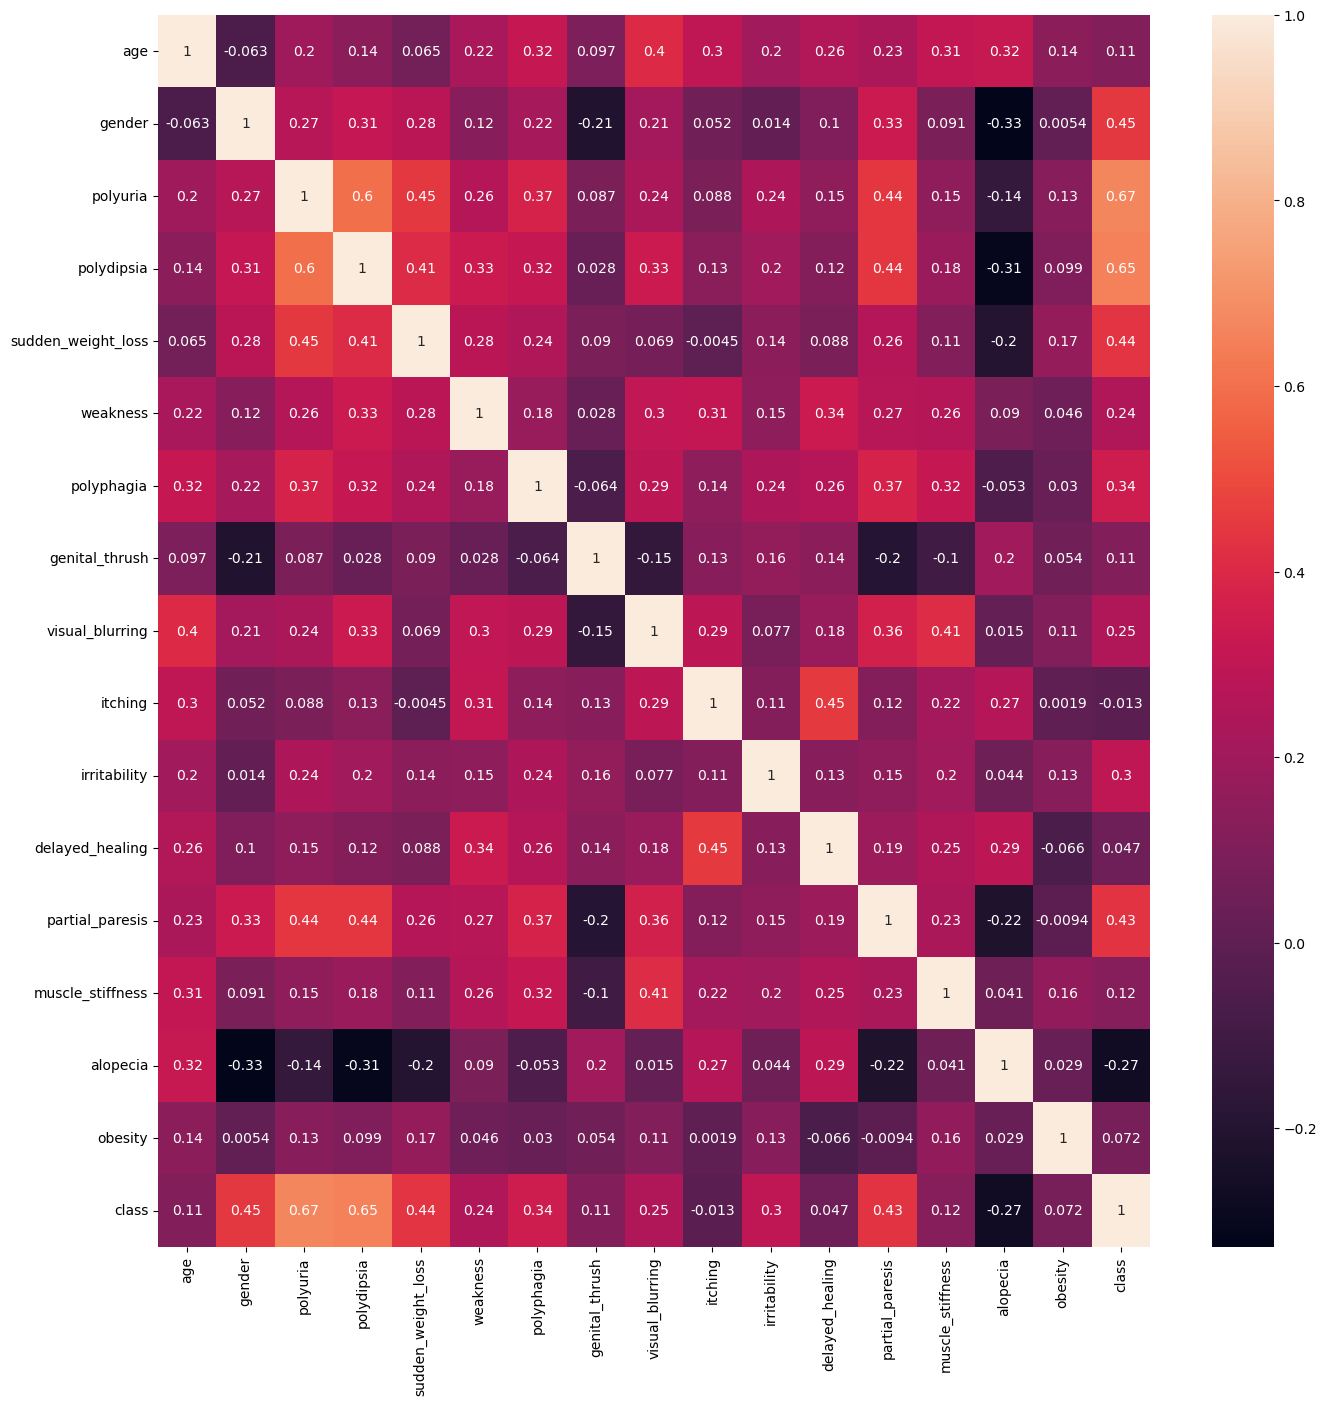

In [12]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot =True)

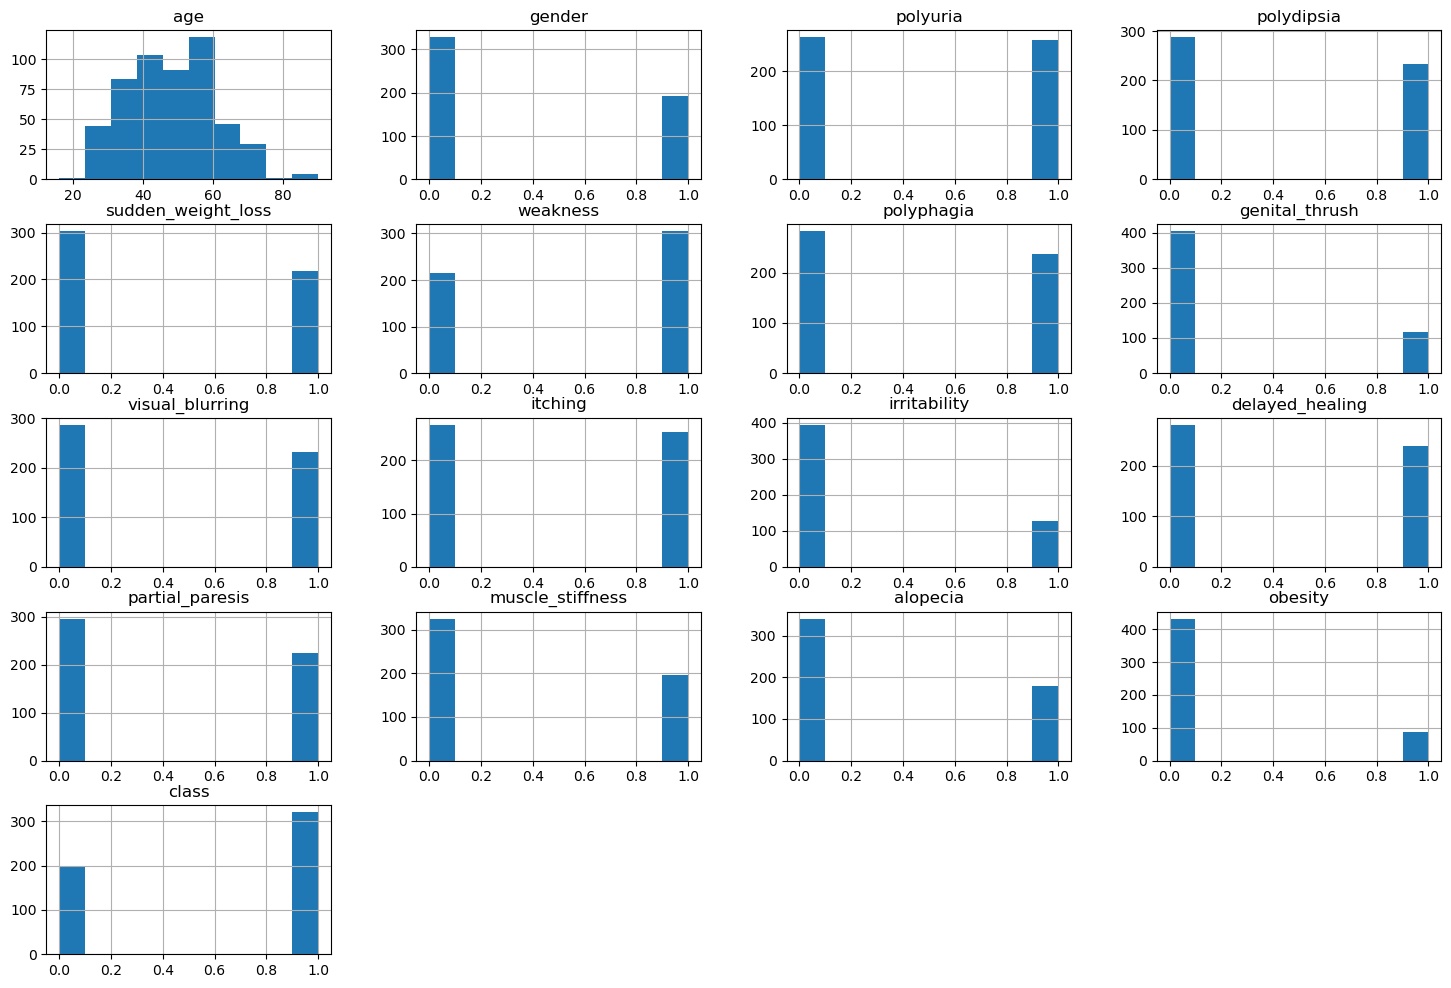

In [13]:
data.hist(figsize=(18,12))
plt.show()

In [14]:
#train_test_splitting of the dataset

data.age/=100
x = data.drop(columns = 'class')

# Getting Predicting Value
y = data['class']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [15]:
data.age

0      0.40
1      0.58
2      0.41
3      0.45
4      0.60
       ... 
515    0.39
516    0.48
517    0.58
518    0.32
519    0.42
Name: age, Length: 520, dtype: float64

In [16]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


416
104
416
104


<a id = "5"></a>
# <p style="background-color:#6b5b95; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ☣ Models ☣</p>

In [17]:
def model_performance(model):
    y_pred = model.fit(x_train, y_train).predict(x_test)
    
    fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Confusion Matrix", "Metrics"))
    
    confusion = confusion_matrix(y_test, y_pred)
    tp = confusion[1,1]
    fn = confusion[1,0]
    fp = confusion[0,1]
    tn = confusion[0,0]
    accuracy  =  ((tp+tn)/(tp+tn+fp+fn))*100
    precision =  (tp/(tp+fp))*100
    recall    =  (tp/(tp+fn))*100
    f1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))*100
    Mean_Squared_Error = mean_squared_error(y_test,y_pred)*100

    colors = ['#93e4c1', '#3baea0', '#118a7e', '#1f6f78']

    show_metrics = pd.DataFrame(data=[[accuracy , precision, recall, f1_score, Mean_Squared_Error]])
    show_metrics = show_metrics.T

    fig.add_trace(go.Heatmap(z = confusion  ,x = ["0 (pred)","1 (pred)"],
                         y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                         colorscale="darkmint", showscale  = False), 
                         row = 1, col = 1)
    for i in range(len(confusion)):
        for j in range(len(confusion[i])):
            fig.add_annotation(
            x=j,
            y=i,
            text=str(confusion[i][j]),
            showarrow=False,
            font=dict(color='black', size=15)
        )

    fig.add_trace(go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score', 'MSE'], 
                    text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='white'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='white',width=1.5))), row = 1, col = 2)
    
    fig.update_layout(title={'text': model.__class__.__name__,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    
    iplot(fig)                       

In [18]:
random_state = 42
models = [GaussianNB(), 
          DecisionTreeClassifier(max_depth = 6, random_state = 123,criterion = 'entropy'),
          SVC(random_state = random_state, probability = True),
          RandomForestClassifier(random_state = random_state),
          LogisticRegression(random_state = random_state),
          KNeighborsClassifier(n_neighbors = 7),
          GradientBoostingClassifier(random_state = random_state),
          AdaBoostClassifier(random_state = random_state),
          XGBClassifier(random_state = random_state),
         ExtraTreesClassifier(random_state = random_state)]

In [19]:
for model in models:
    model_performance(model)